# Maximum Independent Set Problem

The Maximum Independent Set (MIS) problem is a well-known combinatorial optimization problem in computer science and graph theory. Given an undirected graph \( G = (V, E) \), where \( V \) is the set of vertices and \( E \) is the set of edges, the goal is to find the largest subset of vertices \( S &sube; V \) such that no two vertices in \( S \) are adjacent (i.e., there is no edge connecting them).

The problem of finding the Maximum Independent Set is classified as NP-hard. NP-hard problems are decision problems for which no known polynomial-time algorithm exists, and if one could be found, it would imply that all problems in the complexity class NP could be solved in polynomial time. The term "NP-hard" means that the problem is at least as hard as the hardest problems in NP.

## Example

Consider the following example graph with vertices \(A, B, C, D, E, F, G, H\) and edges:

- \(A\) is connected to \(B\) and \(C\).
- \(B\) is connected to \(A\), \(C\), \(D\), and \(E\).
- \(C\) is connected to \(A\), \(B\), \(E\), \(F\), and \(G\).
- \(D\) is connected to \(B\) and \(E\).
- \(E\) is connected to \(B\), \(C\), \(D\), and \(F\).
- \(F\) is connected to \(C\), \(E\), and \(G\).
- \(G\) is connected to \(C\), \(F\), and \(H\).
- \(H\) is connected to \(G\).

In this example, a possible maximum independent set would be \( \{A, D, F, G\} \), as no two vertices in this set share an edge.

![Example Graph](./example-graph.png)

## Importance

The Maximum Independent Set problem has numerous applications in various fields, including computer networking, scheduling, bioinformatics, and VLSI design. It is an NP-hard problem, meaning there is no known polynomial-time algorithm to solve it optimally for all inputs. Therefore, finding efficient approximation algorithms or heuristics is crucial in practice.

## Classical Solution Approaches

1. **Brute Force**: Enumerate all possible subsets of vertices and check if each subset forms an independent set. This approach is exponential in time complexity and is only feasible for small graphs.

2. **Greedy Algorithms**: Greedy algorithms such as the greedy coloring algorithm or greedy maximal independent set algorithm can provide efficient solutions, although they may not always produce the optimal result.

3. **Dynamic Programming**: Dynamic programming techniques can be employed to solve the problem on specific graph classes or instances with certain properties.

4. **Approximation Algorithms**: Various approximation algorithms exist that provide solutions guaranteed to be within a certain factor of the optimal solution.

## Quantum Approaches

Quantum computing offers the potential to solve NP-hard problems more efficiently than classical computing. By leveraging quantum phenomena such as superposition and entanglement, quantum algorithms can explore a vast number of potential solutions simultaneously.

In this tutorial, we will explore two quantum approaches to solve the Maximum Independent Set problem:

1. **Quantum Approximate Optimization Algorithm (QAOA)**: QAOA is a quantum algorithm designed to approximately solve combinatorial optimization problems. It employs a sequence of quantum gates to construct a quantum state that encodes the solution space of the optimization problem. By manipulating this quantum state and measuring certain quantum properties, QAOA can provide approximate solutions to problems like MIS.

2. **Quantum Adiabatic Approach**: The Quantum Adiabatic Approach, also known as Quantum Adiabatic Evolution or Quantum Adiabatic Optimization, is another method for solving optimization problems using quantum computation. It relies on the adiabatic theorem to find the ground state of a Hamiltonian that encodes the optimization problem, which can be related to finding a maximum independent set in certain cases.

## Conclusion

The Maximum Independent Set problem is a fundamental problem in graph theory with wide-ranging applications. While it is computationally challenging, quantum computing offers promising avenues for more efficient solution approaches, potentially enabling the solving of NP-hard problems like MIS in a shorter amount of time compared to classical algorithms. I believe this explanation would suffice to dive into this tutorial. For curious minds, if you want to learn more about this problem, feel free to check out [here](https://en.wikipedia.org/wiki/Maximal_independent_set).


## Let us first create four graphs for this tutorial

### Let us first create a three node graph with random edges

In [1]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

### We are defining an undirected graph with uniform weight edges as 1

In [2]:
def create_graph(num_nodes, edges):
    """
    Create a graph with the specified number of nodes and edges.

    Parameters:
    - num_nodes (int): Number of nodes in the graph.
    - edges (list of tuples): List of tuples representing edges in the graph.
      Each tuple should be of the form (start, end, weight).

    Returns:
    - rx.PyGraph: The created graph.
    """
    graph = rx.PyGraph()

    # Add nodes to the graph
    graph.add_nodes_from(range(num_nodes))

    # Add edges to the graph
    graph.add_edges_from(edges)

    return graph


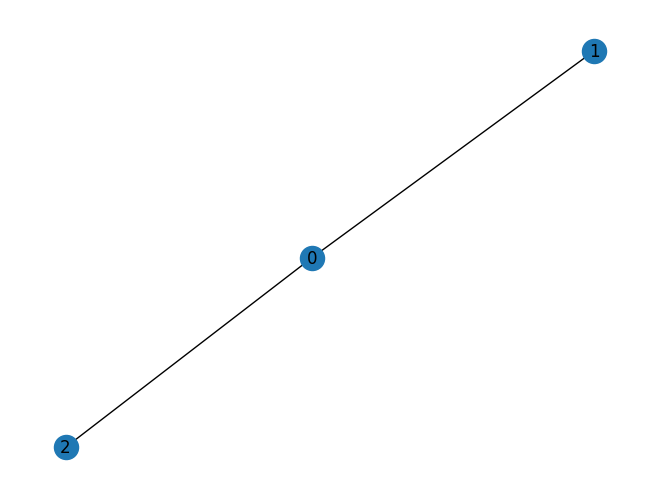

In [3]:
# Define the number of nodes and edges for the graph
num_nodes1 = 3
edgesG1 = [(0, 1, 1), (0, 2, 1)]  # The edge syntax is (start, end, weight)

# Create the graph
G1 = create_graph(num_nodes1, edgesG1)

# Visualize the graph
mpl_draw(G1, with_labels=True)

### Similarly let us create three more graphs

#### 5 Node Graph

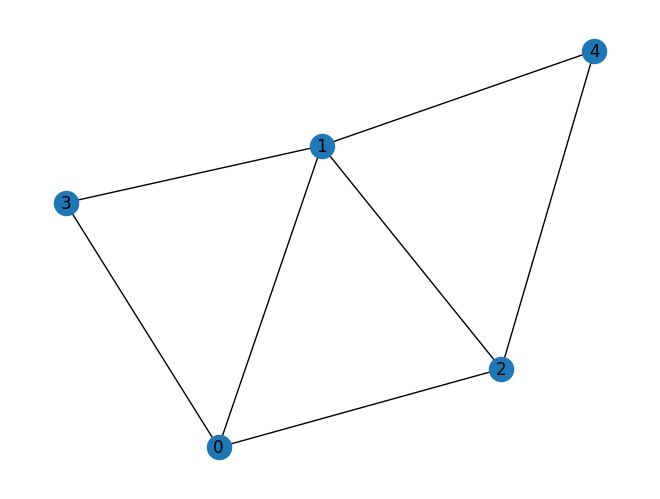

In [4]:
# Define the number of nodes and edges for the graph
num_nodes2 = 5
edgesG2 = [(0, 1, 1), (1, 2, 1), (1, 3, 1), (3, 0, 1), (0, 2, 1), (1, 4, 1), (2, 4, 1)]  # The edge syntax is (start, end, weight)

# Create the graph
G2 = create_graph(num_nodes2, edgesG2)

# Visualize the graph
mpl_draw(G2, with_labels=True)

#### 6 Node Graph

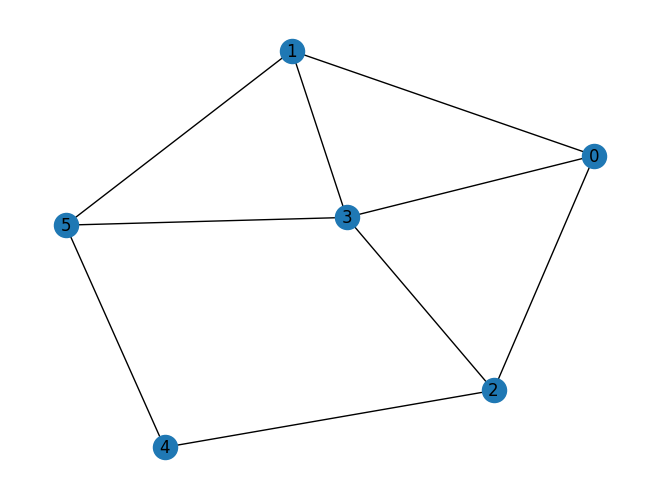

In [5]:
# Define the number of nodes and edges for the graph
num_nodes3 = 6
edgesG3 = [(0, 1, 1), (3, 5, 1), (3, 2, 1), (1, 3, 1), (3, 0, 1), (1, 5, 1), (0, 2, 1), (2, 4, 1), (4, 5, 1)]  # The edge syntax is (start, end, weight)

# Create the graph
G3 = create_graph(num_nodes3, edgesG3)

# Visualize the graph
mpl_draw(G3, with_labels=True)

#### 7 Node Graph

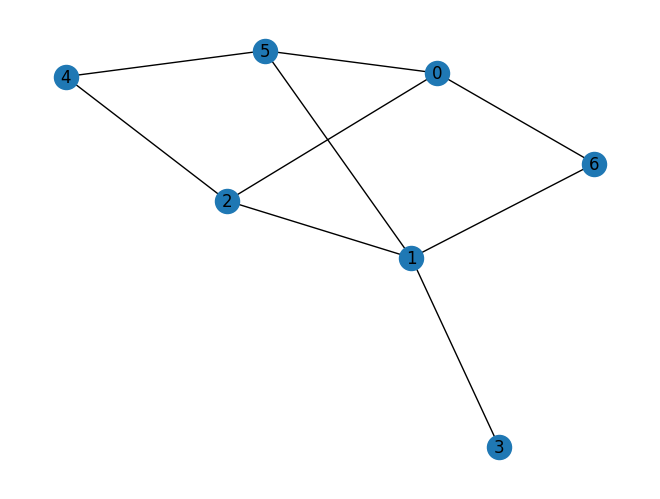

In [6]:
# Define the number of nodes and edges for the graph
num_nodes4 = 7
edgesG4 = [(1, 5, 1), (0, 6, 1), (5, 0, 1), (1, 2, 1), (3, 1, 1), (0, 2, 1), (1, 6, 1), (2, 4, 1), (4, 5, 1)]  # The edge syntax is (start, end, weight)

# Create the graph
G4 = create_graph(num_nodes4, edgesG4)

# Visualize the graph
mpl_draw(G4, with_labels=True)

Now that we have defined all our graphs, let's delve into how we can solve the problem.

# 1st Approach - QAOA Circuit

### QAOA Definition

### Quantum Approximate Optimization Algorithm (QAOA) Circuit

The Quantum Approximate Optimization Algorithm (QAOA) is a quantum algorithm designed to solve combinatorial optimization problems, such as the Maximum Independent Set (MIS) problem. QAOA constructs a quantum circuit that prepares a quantum state encoding the solution space of the optimization problem. By manipulating this quantum state and measuring certain quantum properties, QAOA aims to find an approximate solution to the problem.

#### Circuit Structure

The QAOA circuit consists of alternating layers of single-qubit rotations and entangling gates. In each layer, the rotations and entangling gates are parametrized by angles, which are optimized to maximize the objective function. The objective function corresponds to the expected value of a certain operator, which represents the problem Hamiltonian.

#### Objective Function

In the context of the MIS problem, the objective function of the QAOA circuit is typically defined as the expectation value of the MIS operator. The MIS operator is a Hamiltonian operator that penalizes states where two vertices in the independent set share an edge. Mathematically, the objective function can be expressed as:

$$
\langle \psi | \hat{H} | \psi \rangle
$$

Where:
- $  \langle \psi | $ is the bra-ket notation representing the quantum state prepared by the QAOA circuit.
- $ \hat{H} $ is the MIS operator Hamiltonian.
- $ | \psi \rangle $ is the ket notation representing the quantum state prepared by the QAOA circuit.


#### Optimization

The optimization process involves finding the optimal set of angles for the QAOA circuit that maximizes the objective function. This is typically done using classical optimization algorithms, such as gradient descent or Bayesian optimization. By iteratively adjusting the angles and measuring the objective function, QAOA converges to an approximate solution to the optimization problem.

Let us first prepare the ansatz
For this let us take the first graph and prepare the anstaz, and then generalize it using thesame approach

Let us define the constants first

In [7]:
J = 7

h = 3

Let us start with implementing Cost circuit

First initialize with Hadamard gate

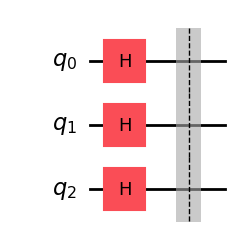

In [8]:
from qiskit.circuit import QuantumCircuit

# Define the number of qubits based on the number of nodes in the graph
num_nodes1 = 3  # Adjust this according to your graph size

# Initialize the quantum circuit with Hadamard gates
qc = QuantumCircuit(num_nodes1)

qc.h(range(num_nodes1))

qc.barrier()  # Add barrier for clarity

# Draw the quantum circuit
qc.draw('mpl')

Now intialize with a parameterized RZ gate

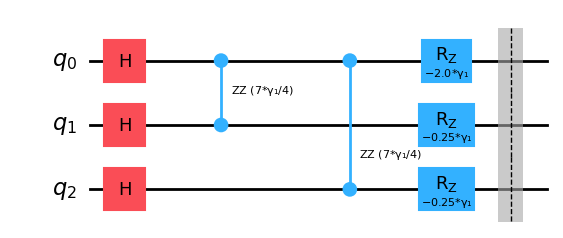

In [9]:
from qiskit.circuit import QuantumCircuit, Parameter

# Define the number of qubits based on the number of nodes in the graph
num_nodes1 = 3  # Adjust this according to your graph size

# Initialize the quantum circuit with Hadamard gates
qc = QuantumCircuit(num_nodes1)

qc.h(range(num_nodes1))

# Define a parameter for the Rz gates
gamma_1 = Parameter('γ₁')

degree_list = [0]*num_nodes1

for (i, j, w) in edgesG1:
    qc.rzz(J*gamma_1/4, i, j)
    degree_list[i] += 1
    degree_list[j] += 1

for node in range(num_nodes1):
    qc.rz(gamma_1*(h/2 - J/4*degree_list[node]), node)

qc.barrier()  # Add barrier for clarity

# Draw the quantum circuit
qc.draw('mpl')


Now, let us implement mixer circuits

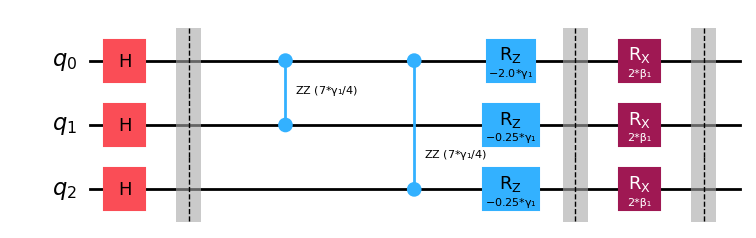

In [10]:
from qiskit.circuit import QuantumCircuit, Parameter

# Define the number of qubits based on the number of nodes in the graph
num_nodes1 = 3  # Adjust this according to your graph size

# Initialize the quantum circuit with Hadamard gates
qc = QuantumCircuit(num_nodes1)

qc.h(range(num_nodes1))

qc.barrier()

# Define a parameter for the Rz gates
gamma_1 = Parameter('γ₁')
beta_1 = Parameter('β₁')

degree_list = [0]*num_nodes1

for (i, j, w) in edgesG1:
    qc.rzz(J*gamma_1/4, i, j)
    degree_list[i] += 1
    degree_list[j] += 1

for node in range(num_nodes1):
    qc.rz(gamma_1*(h/2 - J/4*degree_list[node]), node)

qc.barrier()

# Introduce gates for Mixer Hamiltonian
for node in range(num_nodes1):
    qc.rx(beta_1*2, node)

qc.barrier()  # Add barrier for clarity

# Draw the quantum circuit
qc.draw('mpl')

Let us introce the variable p, which will introduce complxity to the circuit

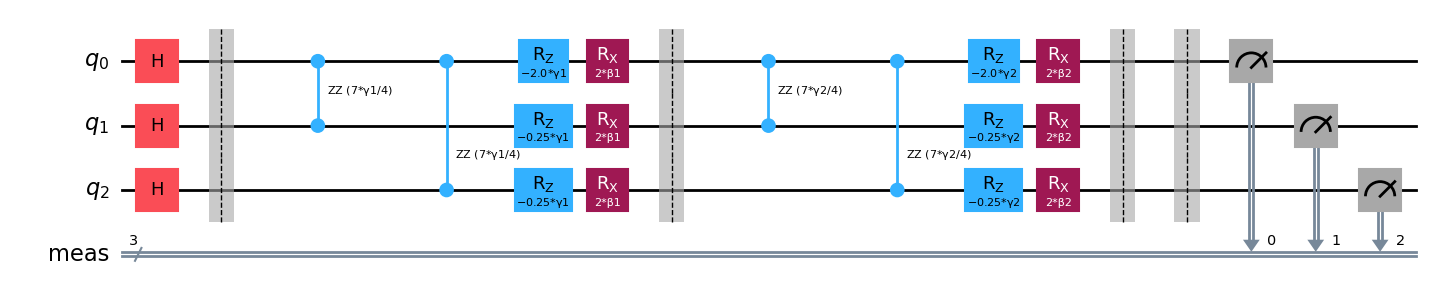

In [11]:
from qiskit.circuit import QuantumCircuit, Parameter

# Define the number of qubits based on the number of nodes in the graph
num_nodes1 = 3  # Adjust this according to your graph size

# Let us introduce p - depth of the circuit
p = 2

# Initialize the quantum circuit with Hadamard gates
qc = QuantumCircuit(num_nodes1)

qc.h(range(num_nodes1))

qc.barrier()

# Define a parameter for the Rz gates

gamma_params = []
beta_params = []

for rep in range(p):
    gamma_params.append(Parameter(f'γ{rep+1}'))
    beta_params.append(Parameter(f'β{rep+1}'))
    
    degree_list = [0]*num_nodes1
    
    for (i, j, w) in edgesG1:
        qc.rzz(J*gamma_params[rep]/4, i, j)
        degree_list[i] += 1
        degree_list[j] += 1
    
    for node in range(num_nodes1):
        qc.rz(gamma_params[rep]*(h/2 - J/4*degree_list[node]), node)
    
    # Introduce gates for Mixer Hamiltonian
    for node in range(num_nodes1):
        qc.rx(beta_params[rep]*2, node)

    qc.barrier()


# Measure all qubits
qc.measure_all()

# Draw the quantum circuit
qc.draw('mpl')

Let's encapsulate all the code to create a QAOA ansatz into a function definition so we can reuse and call it whenever required.

In [12]:
from qiskit.circuit import QuantumCircuit

def MIS_Ansatz(p, num_nodes, gamma_params, beta_params, edges):
    """
    Create a Quantum Circuit implementing the QAOA ansatz for the Maximum Independent Set (MIS) problem.

    Parameters:
    - p (int): Number of layers in the QAOA ansatz.
    - num_nodes (int): Number of nodes in the graph (number of qubits in the circuit).
    - gamma_params (list): List of Parameter objects representing the gamma parameters for each layer.
    - beta_params (list): List of Parameter objects representing the beta parameters for each layer.
    - edges (list of tuples): List of tuples representing edges in the graph.
      Each tuple should be of the form (start, end, weight).

    Returns:
    - QuantumCircuit: Quantum Circuit implementing the QAOA ansatz for the MIS problem.
    """
    qc = QuantumCircuit(num_nodes)

    qc.h(range(num_nodes))
    
    qc.barrier()
    
    
    for rep in range(p):

        degree_list = [0]*num_nodes
        
        for (i, j, w) in edges:
            qc.rzz(J*gamma_params[rep]/4, i, j)
            degree_list[i] += 1
            degree_list[j] += 1
        
        for node in range(num_nodes):
            qc.rz(gamma_params[rep]*(h/2 - J/4*degree_list[node]), node)
        
        # Introduce gates for Mixer Hamiltonian
        for node in range(num_nodes):
            qc.rx(beta_params[rep]*2, node)
    
        qc.barrier()
    
    # Measure all qubits
    qc.measure_all()
    
    return qc

## Now let us test our functions, by binding a random parameters

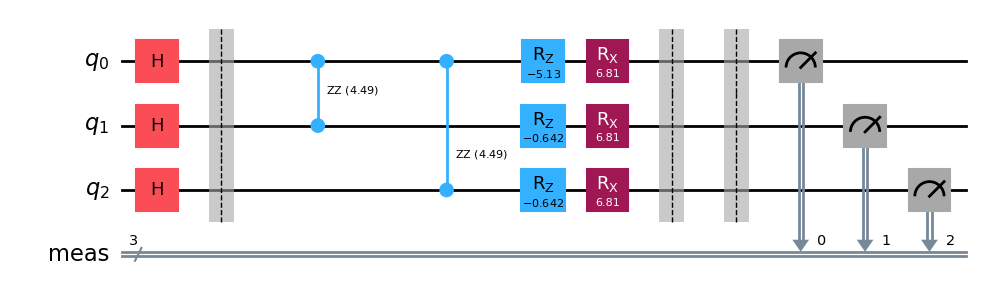

In [13]:
import random
import numpy as np

# Set random seed for reproducibility
random.seed(44)

# Generate random values for gamma and beta parameters
gamma = random.uniform(0, 2 * np.pi)
beta = random.uniform(0, 2 * np.pi)

# Create an instance of the MIS_Ansatz function with specified parameters
ansatz_1 = MIS_Ansatz(p=1, num_nodes=3, gamma_params=[gamma], beta_params=[beta], edges=edgesG1)

# Draw the quantum circuit representing the QAOA ansatz
ansatz_1.draw('mpl')

Let us now create a function to reverse the bitstrings, the bitstrings returned by Qiskit are ordered in reverse direction

In [14]:
def rev_bitstrings(counts):
    """
    Reverse the bitstrings in a dictionary of counts.

    Parameters:
    - counts (dict): Dictionary where keys are bitstrings and values are counts.

    Returns:
    - dict: Dictionary with reversed bitstrings as keys and corresponding counts.
    """
    n_counts = {}
    for key, value in counts.items():
        n_counts[key[::-1]] = value
    return n_counts


In [15]:
from qiskit.primitives import Sampler
import qiskit

# Run the quantum circuit 'ansatz_1' on the AerSimulator with specified parameters
# and retrieve the result
result = Sampler().run(ansatz_1, seed_simulator=10).result()

counts = [q.binary_probabilities() for q in result.quasi_dists][0]

# Get the counts of measurement outcomes from the result, and reverse the bitstrings
counts = rev_bitstrings(counts)

# Print the counts of measurement outcomes
print('Counts:', counts)

Counts: {'000': 0.0680137137859265, '100': 0.2546880454351132, '010': 0.1359779604646054, '110': 0.0742384698367047, '001': 0.1359779604646054, '101': 0.0742384698367047, '011': 0.1709964337224966, '111': 0.0858689464538428}


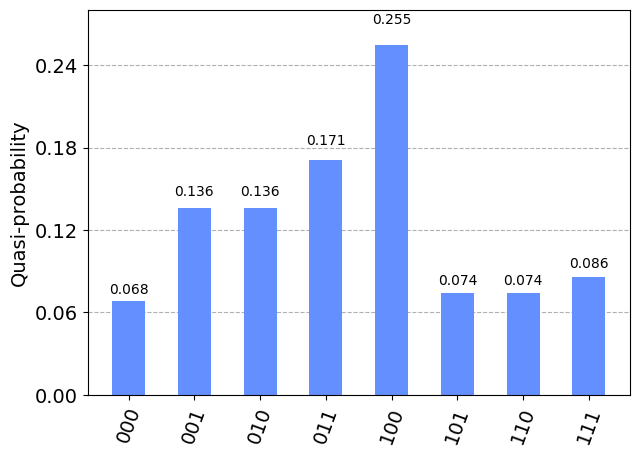

In [16]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

#### **NOTE:** Do not care abot the histogram above, this is just a random result for random parameters, we will soon be optimizing our parameters

Let us create a objective function for MIS

In [17]:
def MIS_Objective(bitstring, graph, num_nodes):
    """
    Calculate the objective function value for a given bitstring in the context of the Maximum Independent Set (MIS) problem.

    Parameters:
    - bitstring (str): Binary string representing a potential independent set in the graph.
    - graph (list of tuples): List of tuples representing edges in the graph.
      Each tuple should be of the form (start, end, weight).

    Returns:
    - int: Objective function value indicating the cost associated with the given bitstring.
    """
    validity = True

    obj = 0

    energy = 0

    ind_nodes = [bool(int(bit)) for bit in bitstring]

    for i, j, w in graph:
        if (ind_nodes[i] and ind_nodes[j]):
            validity = False

    if validity:
        for node in ind_nodes:
            if node:
                obj += 1 

    for i, j, w in graph:
        energy += J * ind_nodes[i] * ind_nodes[j]
    for node in range(num_nodes):
        energy += -h * ind_nodes[node]
    
    return validity, obj, energy

**NOTE**: Here we are using an objective function, we can also use `QUBO` matrix to solve the same problem. We will be seeinng it later when we work on `Quantum Adiabatic Simulation`

Let us test our objective function by passing the solution bitstring of our `G1` graph

In [18]:
MIS_Objective('011', edgesG1, num_nodes1)

(True, 2, -6)

`MIS_Objective` function gives the minimum cost for `011` as expected

#### Let us compute energy, which is nothing but the consolidated cost achieved through an experiment of numerous bitstrings repeating for a varied number of times.

In [19]:
import numpy as np

def MIS_energy(counts_dict, graph, num_nodes):
    """
    Compute the energy, which represents the consolidated cost achieved through an experiment of numerous bitstrings repeating for a varied number of times.

    Parameters:
    - counts_dict (dict): Dictionary where keys are bitstrings and values are counts obtained from measurement outcomes.
    - graph (list of tuples): List of tuples representing edges in the graph.
      Each tuple should be of the form (start, end, weight).

    Returns:
    - float: Energy value representing the average cost achieved across all measurement outcomes.
    """

    hamiltonian = []
    validity_values = []
    obj_values = []

    # Iterate over each bitstring and its corresponding counts
    for bitstring, probs in counts_dict.items():
        # Calculate the cost associated with the bitstring
        validity, obj, energy = MIS_Objective(bitstring[::-1], graph, num_nodes)

        hamiltonian.append(energy)
        validity_values.append(validity)
        obj_values.append(obj)

    expected_hamiltonian = np.dot(hamiltonian, list(counts_dict.values()))

    # Compute the average energy
    return {
                'Expected Hamiltonian': expected_hamiltonian,
                'Validity Values': validity_values
           }

Let us check the energy corresponding to the ansatz we initialized with random parameters earlier.

In [20]:
MIS_energy(counts, edgesG1, num_nodes1)['Expected Hamiltonian']

-1.350783082284785

As expected, the ansatz performs poorly with positive energy, as the parameters were randomly chosen.

Combining all these functions together, let us now create another function for the optimizer to optimize the `gamma` and `beta` parameters

In [21]:
def optimization_objective(p, graph, num_nodes):
    """
    Define an optimization objective function for the QAOA parameters optimization.

    Parameters:
    - p (int): Number of layers in the QAOA ansatz.
    - graph (list of tuples): List of tuples representing edges in the graph.
      Each tuple should be of the form (start, end, weight).
    - num_nodes (int): Number of nodes in the graph (number of qubits in the circuit).

    Returns:
    - function: Objective function that computes the energy based on QAOA parameters.
    """
    def objective(params):
        """
        Compute the energy based on QAOA parameters.

        Parameters:
        - params (list): List of QAOA parameters, where the first p values are gamma parameters
          and the remaining p values are beta parameters.

        Returns:
        - float: Energy value representing the average cost achieved across all measurement outcomes.
        """
        # Split the parameters into gamma and beta parameters
        gamma_params = params[:p]
        beta_params = params[p:]
        
        # Generate the QAOA ansatz circuit with the given parameters
        ansatz = MIS_Ansatz(p=p, num_nodes=num_nodes, gamma_params=gamma_params, beta_params=beta_params, edges=graph)

        # Simulate the quantum circuit on the AerSimulator
        result = Sampler().run(ansatz, seed_simulator=10).result()

        counts = [q.binary_probabilities() for q in result.quasi_dists][0]
        
        # Compute the energy based on the measurement outcomes
        energy = MIS_energy(counts, graph, num_nodes)['Expected Hamiltonian']

        return energy

    return objective

Let us now use the function we created above to pass inside the `minimize` function of `scipy` library

In [166]:
from scipy.optimize import minimize

# Set the number of layers in the QAOA ansatz
p = 3

# Define the optimization objective function based on the QAOA parameters
objective = optimization_objective(p=p, graph=edgesG1, num_nodes=3)

# Generate initial random parameters for optimization
initial_params = [random.uniform(0, 2 * np.pi) for i in range(2*p)]

# Perform optimization using the COBYLA method
op_job = minimize(objective, initial_params, method='SLSQP', options =  {"ftol" : 1e-11,"eps": 1e-8})

# Print the optimization result
op_job

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.3650686834973405
       x: [ 4.725e+00  1.091e+00  2.024e+00 -6.642e-01  6.120e+00
            2.385e+00]
     nit: 25
     jac: [-2.931e-06  4.974e-06  7.017e-06  2.220e-06 -8.882e-07
            1.510e-06]
    nfev: 197
    njev: 25

Let's initialize our circuit with the optiomized parameters we found above

In [167]:
# Retrieve optimized gamma and beta parameters from the optimization result
gamma_params = op_job['x'][p:]
beta_params = op_job['x'][:p]

# Generate the QAOA ansatz circuit with the optimized parameters
circuit = MIS_Ansatz(p=p, num_nodes=3, gamma_params=gamma_params, beta_params=beta_params, edges=edgesG1)

# Simulate the quantum circuit on the AerSimulator
result = Sampler().run(circuit, seed_simulator=10).result()

counts = [q.binary_probabilities() for q in result.quasi_dists][0]

counts = rev_bitstrings(counts)

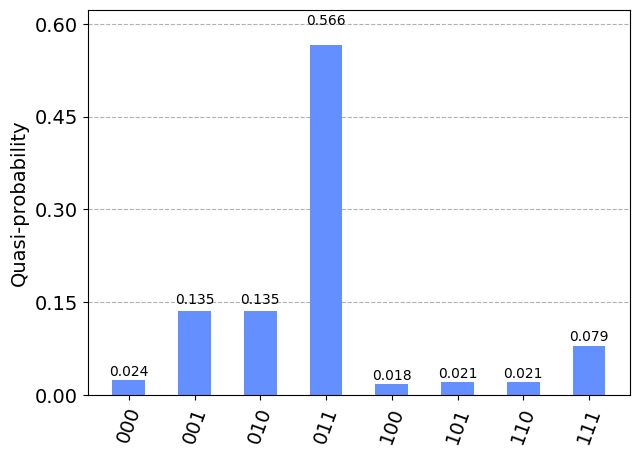

In [168]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

Thus the solution for graph `G1` using QAOA method is `011`

In [169]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 011


Let us colour the nodes belonging to the Independent set with `Red`

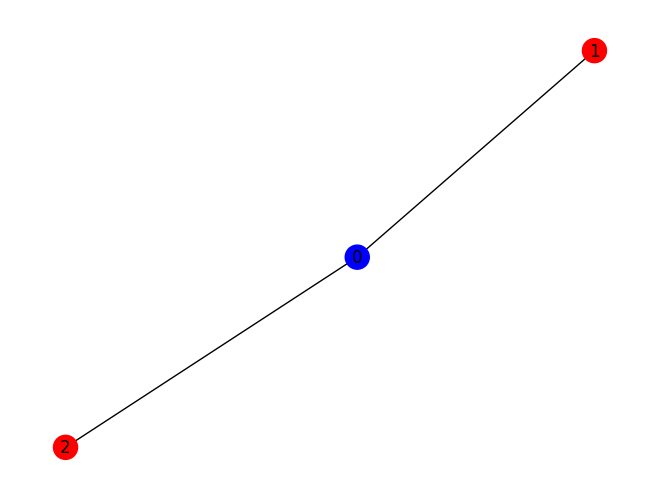

In [170]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G1, with_labels=True, node_color=node_colors)

---

## QAOA for 5 Node graph

Let us similarly find the solution for a 5 noded graph

In [177]:
from scipy.optimize import minimize

# Set the number of layers in the QAOA ansatz
p = 3

# Define the optimization objective function based on the QAOA parameters
objective = optimization_objective(p=p, graph=edgesG2, num_nodes=5)

# Generate initial random parameters for optimization
initial_params = [random.uniform(0, 2 * np.pi) for i in range(2*p)]

# Perform optimization using the COBYLA method
op_job = minimize(objective, initial_params, method='COBYLA')

# Print the optimization result
op_job

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.8649010784700646
       x: [ 1.330e+00  6.215e+00  3.862e+00  3.581e+00  1.209e+00
            5.478e-01]
    nfev: 372
   maxcv: 0.0

Feel free to the increase the value of `p` until you reach the right solution, please note that as number of node increases, we need to increase the `p` value. As, `p` increases `circuit complexity` also increases. Also note that increasing the value of `p` doesn't always increase the amplitude of the right solution, vary the value `p` until you get the right solution

In [178]:
# Retrieve optimized gamma and beta parameters from the optimization result
gamma_params = op_job['x'][p:]
beta_params = op_job['x'][:p]

# Generate the QAOA ansatz circuit with the optimized parameters and specified graph edges
circuit = MIS_Ansatz(p=p, num_nodes=5, gamma_params=gamma_params, beta_params=beta_params, edges=edgesG2)

# Simulate the quantum circuit on the AerSimulator
result = Sampler().run(circuit, seed_simulator=10).result()

counts = [q.binary_probabilities() for q in result.quasi_dists][0]

counts = rev_bitstrings(counts)

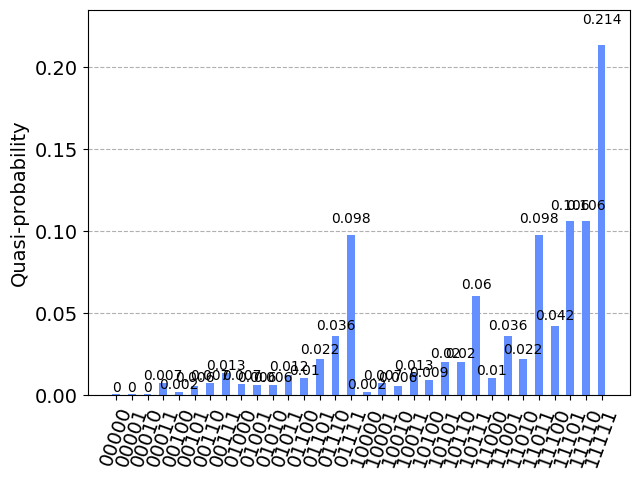

In [179]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [180]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 11111


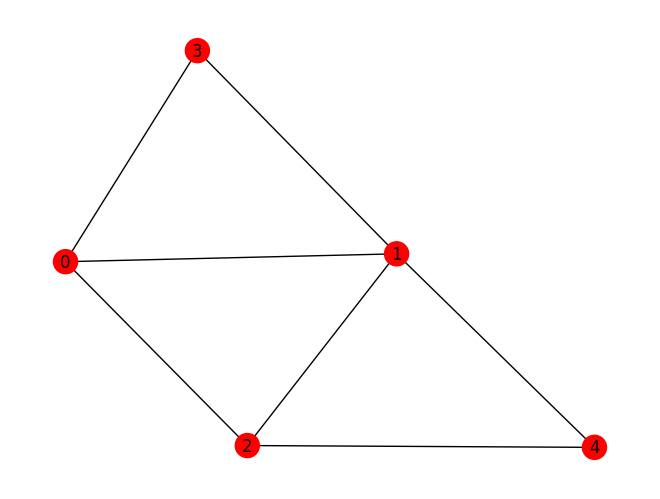

In [181]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G2, with_labels=True, node_color=node_colors)

---

## QAOA for 6 Node graph

In [182]:
from scipy.optimize import minimize

# Set the number of layers in the QAOA ansatz
p = 4

# Define the optimization objective function based on the QAOA parameters
objective = optimization_objective(p=p, graph=edgesG3, num_nodes=6)

# Generate initial random parameters for optimization
initial_params = [random.uniform(0, 2 * np.pi) for i in range(2*p)]

# Perform optimization using the COBYLA method
op_job = minimize(objective, initial_params, method='COBYLA')

# Print the optimization result
op_job

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -1.9732149141650899
       x: [ 2.777e+00  2.289e+00  1.069e+00  2.093e+00  6.322e+00
            2.676e+00  7.839e-02  5.877e+00]
    nfev: 1000
   maxcv: 0.0

In [183]:
# Retrieve optimized gamma and beta parameters from the optimization result
gamma_params = op_job['x'][p:]
beta_params = op_job['x'][:p]

# Generate the QAOA ansatz circuit with the optimized parameters and specified graph edges
circuit = MIS_Ansatz(p=p, num_nodes=6, gamma_params=gamma_params, beta_params=beta_params, edges=edgesG3)

# Simulate the quantum circuit on the AerSimulator
result = Sampler().run(circuit, seed_simulator=10).result()

counts = [q.binary_probabilities() for q in result.quasi_dists][0]

counts = rev_bitstrings(counts)

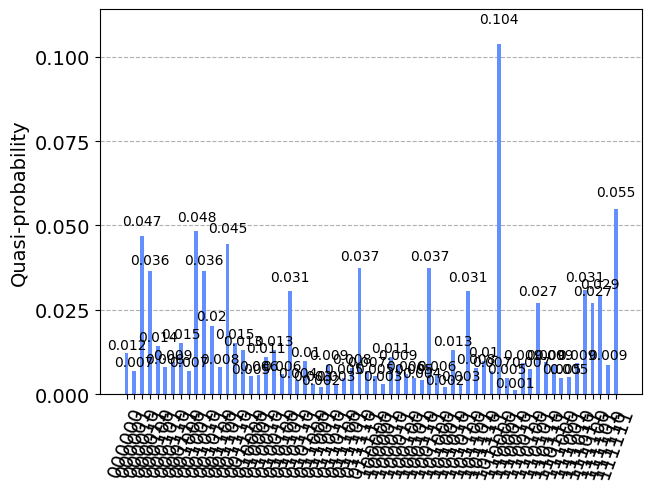

In [184]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [185]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 110000


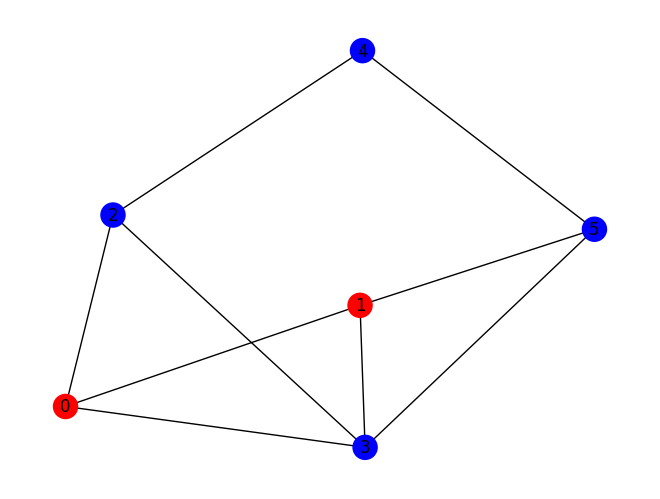

In [186]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G3, with_labels=True, node_color=node_colors)

---

## QAOA for 7 Node graph

In [120]:
from scipy.optimize import minimize

# Set the number of layers in the QAOA ansatz
p = 4

# Define the optimization objective function based on the QAOA parameters
objective = optimization_objective(p=p, graph=edgesG4, num_nodes=7)

# Generate initial random parameters for optimization
initial_params = [random.uniform(0, 2 * np.pi) for i in range(2*p)]

# Perform optimization using the COBYLA method
op_job = minimize(objective, initial_params, method='COBYLA', options={'maxiter': 100, 'disp': True})

# Print the optimization result
op_job


   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =  100   F =-2.127280E+00    MAXCV = 0.000000E+00
   X = 5.405684E+00   8.436859E-02   1.533826E+00   2.455161E+00   7.582895E-01
       6.111680E+00   1.757923E+00   1.359632E+00


 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -2.1272802106834554
       x: [ 5.406e+00  8.437e-02  1.534e+00  2.455e+00  7.583e-01
            6.112e+00  1.758e+00  1.360e+00]
    nfev: 100
   maxcv: 0.0

In [121]:
# Retrieve optimized gamma and beta parameters from the optimization result
gamma_params = op_job['x'][p:]
beta_params = op_job['x'][:p]

# Generate the QAOA ansatz circuit with the optimized parameters and specified graph edges
circuit = MIS_Ansatz(p=p, num_nodes=7, gamma_params=gamma_params, beta_params=beta_params, edges=edgesG4)

# Simulate the quantum circuit on the AerSimulator
result = Sampler().run(circuit, seed_simulator=10).result()

counts = [q.binary_probabilities() for q in result.quasi_dists][0]

counts = rev_bitstrings(counts)

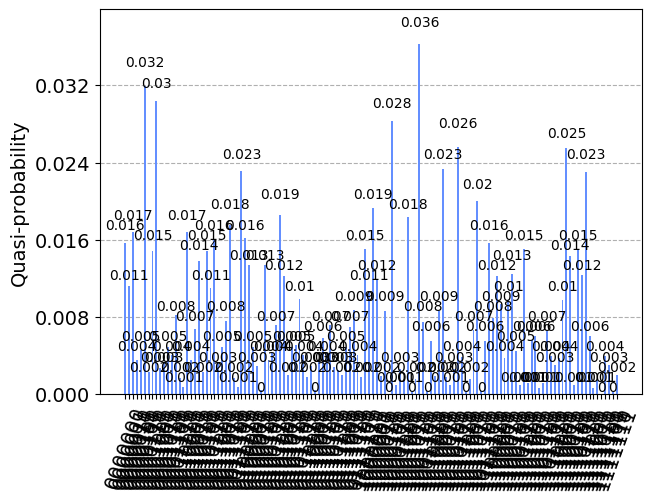

In [122]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [123]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 1001100


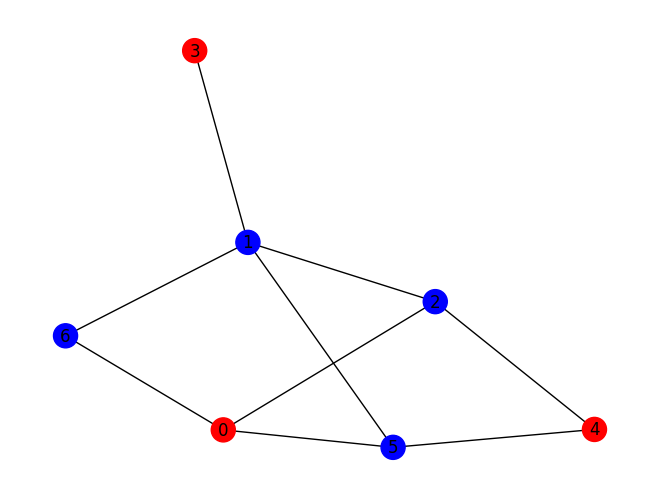

In [124]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G4, with_labels=True, node_color=node_colors)

#### There could be some errors and mistakes in this approach. The solution also changes differently for different runs. I might need to study this further and come up with rectifications later. As this notebook should be submitted for screening within two weeks of registration, I couldn't able to figure out the mistake. I am still learning new things on this topic every day, I will continue to work on this assignment. I will strive to find the best approach possible.

---
---

# 2nd Approach - Quantum Adiabatic Simulation

## Quantum Adiabatic Simulation - Definition

### Quantum Adiabatic Simulation

The Quantum Adiabatic Simulation is a method for solving optimization problems using quantum computation. It is based on the adiabatic theorem from quantum mechanics, which states that a system remains in its instantaneous eigenstate if a perturbation is acting on it slowly enough and if there is a gap between the eigenvalue and the rest of the spectrum. The idea behind quantum adiabatic simulation is to encode an optimization problem into the ground state of a time-dependent Hamiltonian, such that the ground state of the final Hamiltonian corresponds to the optimal solution of the optimization problem.

#### Mathematical Expression

The time-dependent Hamiltonian $ H(t) $ is defined as:

$$ H(t) = (1 - \frac{t}{T}) H_0 + \frac{t}{T} H_p $$

Where:
- $ H_0 $ represents the initial Hamiltonian, often chosen to be a simple-to-prepare Hamiltonian whose ground state is easy to compute.
- $ H_p $ represents the problem Hamiltonian, encoding the optimization problem of interest.
- $ T $ is the total evolution time.

The adiabatic theorem guarantees that if the evolution of the system is slow enough, it will remain in the ground state of the time-dependent Hamiltonian. Therefore, by starting in the ground state of $ H_0 $ and slowly evolving the system according to $ H(t) $, it is expected to end up in the ground state of $ H_p $, which ideally corresponds to the optimal solution of the optimization problem.


The concept, idea, and code implementation were derived from the Pulser documentation on Quantum Adiabatic Simulation, as given in the tasks document. You can find the documentation [here](https://pulser.readthedocs.io/en/stable/tutorials/qubo.html)

In [42]:
## Importing all the necessary functions and objects from pulser

import numpy as np
import matplotlib.pyplot as plt
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

### Let us define a function to create a `QUBO` matrix specific to our graph

In [43]:
def QUBO_matrix(edges, num_nodes):
    """
    Generate a Quadratic Unconstrained Binary Optimization (QUBO) matrix based on the given edges and number of nodes.

    Parameters:
    - edges (list of tuples): List of tuples representing edges in the graph. Each tuple should be of the form (start, end, weight).
    - num_nodes (int): Number of nodes in the graph.

    Returns:
    - numpy.ndarray: The QUBO matrix representing the optimization problem.
    """
    # Initialize a matrix of zeros
    Q = np.zeros([num_nodes, num_nodes])

    # Set the diagonal elements to -1
    for node in range(num_nodes):
        Q[node, node] = -1

    # Update the matrix with edge weights
    for (i, j, w) in edges:
        Q[i, j] = 2 * w
        Q[j, i] = 2 * w

    return Q

In [44]:
Q = QUBO_matrix(edgesG1, 3)
Q

array([[-1.,  2.,  2.],
       [ 2., -1.,  0.],
       [ 2.,  0., -1.]])

This is the QUBO matrix of our graph `G1`

In [45]:
bitstrings = [np.binary_repr(i, len(Q)) for i in range(2 ** len(Q))]
costs = []

# Calculate the cost for each bitstring
for b in bitstrings:
    z = np.array(list(b), dtype=int)
    cost = z.T @ Q @ z
    costs.append(cost)

# Combine bitstrings and their corresponding costs into a list of tuples
zipped = zip(bitstrings, costs)

# Sort the list of tuples based on the cost
sort_zipped = sorted(zipped, key=lambda x: x[1])

# Print the sorted list of tuples
print(sort_zipped)

[('011', -2.0), ('001', -1.0), ('010', -1.0), ('100', -1.0), ('000', 0.0), ('101', 2.0), ('110', 2.0), ('111', 5.0)]


The QUBO matrix, we have chosen have provided the right solution `011` for our graph `G1`

### We will be representing each of our nodes in the graph as `Rydberg Atoms`(qubits) embedded onto a register. So now we must find the approximate positions to place our nodes(qubits) in the register. Below function `evaluate_mapping` does that work for us

The key idea is to encode the off-diagonal terms of $Q$ by using the Rydberg interaction between atoms. As the interaction $U$ depends on the pairwise distance $(U=C_6/r_{ij}^6)$ between atoms $i$ and $j$, we attempt to find the optimal positions of the atoms in the Register that replicate best the off-diagonal terms of $Q$:

In [46]:
def evaluate_mapping(new_coords, *args):
    """
    Cost function to minimize. Ideally, the pairwise distances are conserved.

    Parameters:
    - new_coords (numpy.ndarray): New coordinates to be evaluated.
    - args: Additional arguments required for the cost function. 
            It includes the QUBO matrix (Q) and the shape of the new coordinates.

    Returns:
    - float: The cost value representing the discrepancy between the pairwise distances of the original and new coordinates.
    """
    Q, shape = args

    # Reshape the new coordinates
    new_coords = np.reshape(new_coords, shape)

    # Calculate the pairwise distances and interaction coefficients for the new coordinates
    new_Q = squareform(DigitalAnalogDevice.interaction_coeff / pdist(new_coords) ** 6)

    # Calculate the norm of the difference between the new QUBO matrix and the original QUBO matrix
    return np.linalg.norm(new_Q - Q)

In [47]:
shape = (len(Q), 2)

# Initialize an empty list to store costs
costs = []

# Set the random seed for reproducibility
np.random.seed(0)

# Generate initial random coordinates
x0 = np.random.random(shape).flatten()

# Perform optimization to find the optimal coordinates that minimize the cost
res = minimize(
    evaluate_mapping,
    x0,
    args=(Q, shape),
    method="Nelder-Mead",
    tol=1e-6,
    options={"maxiter": 200000},
)

# Reshape the optimized coordinates
coords = np.reshape(res.x, (len(Q), 2))

# Print the optimization result
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.732614465658913
             x: [ 1.690e+00 -1.585e+00 -3.894e+00  8.819e+00  7.274e+00
                 -1.199e+01]
           nit: 1592
          nfev: 2520
 final_simplex: (array([[ 1.690e+00, -1.585e+00, ...,  7.274e+00,
                        -1.199e+01],
                       [ 1.690e+00, -1.585e+00, ...,  7.274e+00,
                        -1.199e+01],
                       ...,
                       [ 1.690e+00, -1.585e+00, ...,  7.274e+00,
                        -1.199e+01],
                       [ 1.690e+00, -1.585e+00, ...,  7.274e+00,
                        -1.199e+01]]), array([ 1.733e+00,  1.733e+00,  1.733e+00,  1.733e+00,
                        1.733e+00,  1.733e+00,  1.733e+00]))

#### Let's create the register, using the obtained coordinates

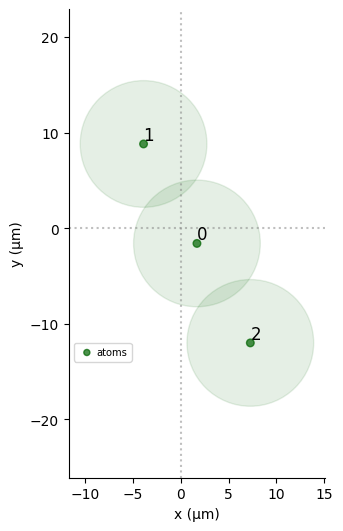

In [48]:
# Create a dictionary mapping qubit indices to their coordinates
qubits = dict(enumerate(coords))

# Create a Register object using the qubit coordinates
reg = Register(qubits)

# Draw the register with specified parameters
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

In [49]:
# We choose a median value between the min and the max
Omega = np.median(Q[Q > 0].flatten())
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 6000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

#### Below we define an adiabatic pulse using InterpolatedWaveform, then create a Sequence object for the register using the DigitalAnalogDevice, declare a channel named `ising` with type `rydberg_global`, and finally add the adiabatic pulse to the `ising` channel

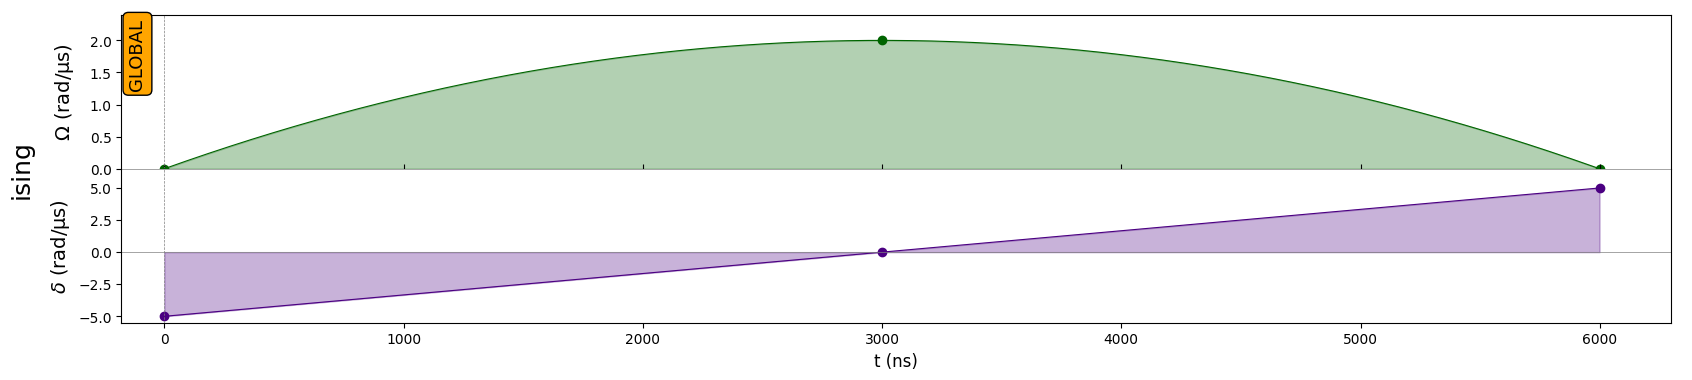

In [50]:
# Define the adiabatic pulse with InterpolatedWaveform
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)

# Create a Sequence object for the register using the DigitalAnalogDevice
seq = Sequence(reg, DigitalAnalogDevice)

# Declare a channel named "ising" with type "rydberg_global"
seq.declare_channel("ising", "rydberg_global")

# Add the adiabatic pulse to the "ising" channel
seq.add(adiabatic_pulse, "ising")

# Draw the sequence
seq.draw()

#### Let us create an QutipEmulator object from the sequence, run the simulation, retrieve the final state of the simulation, and sample the final state to obtain counts

In [51]:
# Create a QutipEmulator object from the sequence
simul = QutipEmulator.from_sequence(seq)

# Run the simulation
results = simul.run()

# Get the final state of the simulation
final = results.get_final_state()

# Sample the final state to obtain counts
counts = results.sample_final_state()

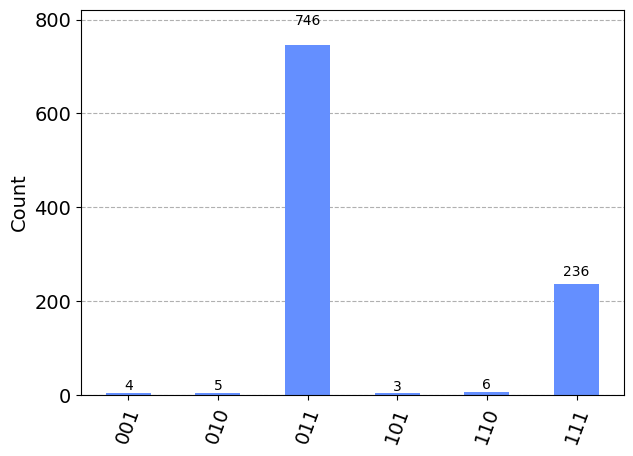

In [52]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [53]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 011


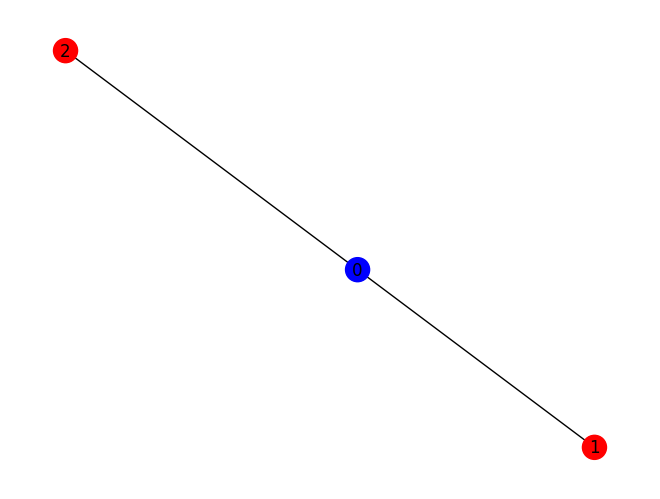

In [54]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G1, with_labels=True, node_color=node_colors)

In [55]:
def get_cost_colouring(bitstring, Q):
    z = np.array(list(bitstring), dtype=int)
    cost = z.T @ Q @ z
    return cost


def get_cost(counter, Q):
    cost = sum(counter[key] * get_cost_colouring(key, Q) for key in counter)
    return cost / sum(counter.values())  # Divide by total samples

In [56]:
cost = []
for T in 1000 * np.linspace(1, 10, 10):
    # Create a new Sequence object for each iteration
    seq = Sequence(reg, DigitalAnalogDevice)
    
    # Declare the "ising" channel with type "rydberg_global"
    seq.declare_channel("ising", "rydberg_global")
    
    # Define the adiabatic pulse with InterpolatedWaveform
    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [delta_0, 0, delta_f]),
        0,
    )
    
    # Add the adiabatic pulse to the "ising" channel
    seq.add(adiabatic_pulse, "ising")
    
    # Create a QutipEmulator object from the sequence
    simul = QutipEmulator.from_sequence(seq)
    
    # Run the simulation
    results = simul.run()
    
    # Get the final state of the simulation
    final = results.get_final_state()
    
    # Sample the final state to obtain counts
    count_dict = results.sample_final_state()
    
    # Calculate the cost and append it to the list
    cost.append(get_cost(count_dict, Q) / 3)

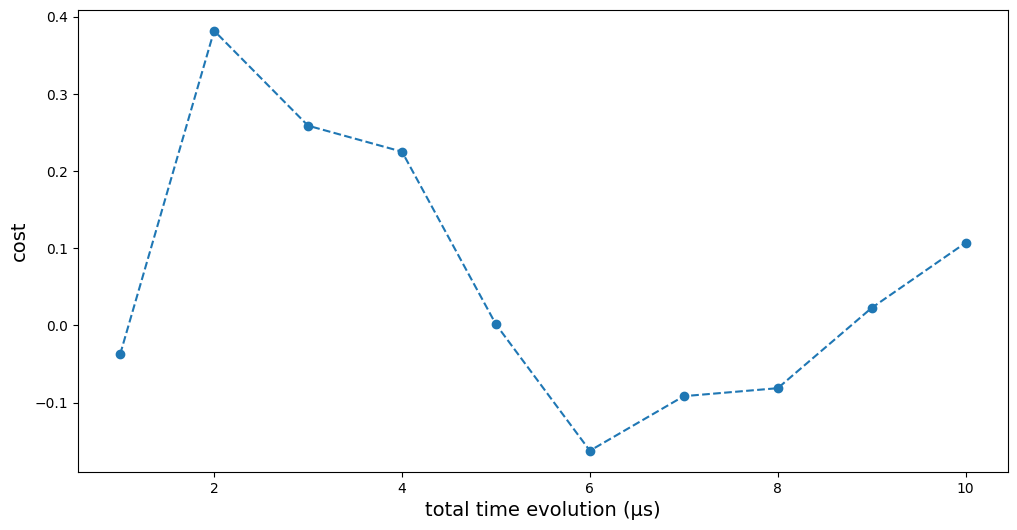

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(cost), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

From the graph, we could see that as the time evolves the cost also varies, we need to pick the time where the cost is at least and run the simulation again, to achieve the best possible result

------------------------------------------------------------------------

## Quantum Adiabatic Simulation for 5 Node graph

In [58]:
Q = QUBO_matrix(edgesG2, 5)
Q

array([[-1.,  2.,  2.,  2.,  0.],
       [ 2., -1.,  2.,  2.,  2.],
       [ 2.,  2., -1.,  0.,  2.],
       [ 2.,  2.,  0., -1.,  0.],
       [ 0.,  2.,  2.,  0., -1.]])

In [59]:
bitstrings = [np.binary_repr(i, len(Q)) for i in range(2 ** len(Q))]
costs = []

# Calculate the cost for each bitstring
for b in bitstrings:
    z = np.array(list(b), dtype=int)
    cost = z.T @ Q @ z
    costs.append(cost)

# Combine bitstrings and their corresponding costs into a list of tuples
zipped = zip(bitstrings, costs)

# Sort the list of tuples based on the cost
sort_zipped = sorted(zipped, key=lambda x: x[1])

# Print the sorted list of tuples
print(sort_zipped)

[('00011', -2.0), ('00110', -2.0), ('10001', -2.0), ('00001', -1.0), ('00010', -1.0), ('00100', -1.0), ('01000', -1.0), ('10000', -1.0), ('00000', 0.0), ('00111', 1.0), ('10011', 1.0), ('00101', 2.0), ('01001', 2.0), ('01010', 2.0), ('01100', 2.0), ('10010', 2.0), ('10100', 2.0), ('11000', 2.0), ('01011', 5.0), ('01110', 5.0), ('10101', 5.0), ('10110', 5.0), ('11001', 5.0), ('10111', 8.0), ('01101', 9.0), ('11010', 9.0), ('11100', 9.0), ('01111', 12.0), ('11011', 12.0), ('11101', 16.0), ('11110', 16.0), ('11111', 23.0)]


In [60]:
shape = (len(Q), 2)

# Initialize an empty list to store costs
costs = []

# Set the random seed for reproducibility
np.random.seed(0)

# Generate initial random coordinates
x0 = np.random.random(shape).flatten()

# Perform optimization to find the optimal coordinates that minimize the cost
res = minimize(
    evaluate_mapping,
    x0,
    args=(Q, shape),
    method="Nelder-Mead",
    tol=1e-6,
    options={"maxiter": 200000},
)

# Reshape the optimized coordinates
coords = np.reshape(res.x, (len(Q), 2))

# Print the optimization result
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.5742237389145517
             x: [ 3.209e+00  1.077e+01 -5.828e+00  3.192e+00 -1.417e+01
                 -5.145e+00 -7.882e+00  1.482e+01 -2.771e+00 -8.216e+00]
           nit: 4651
          nfev: 6599
 final_simplex: (array([[ 3.209e+00,  1.077e+01, ..., -2.771e+00,
                        -8.216e+00],
                       [ 3.209e+00,  1.077e+01, ..., -2.771e+00,
                        -8.216e+00],
                       ...,
                       [ 3.209e+00,  1.077e+01, ..., -2.771e+00,
                        -8.216e+00],
                       [ 3.209e+00,  1.077e+01, ..., -2.771e+00,
                        -8.216e+00]]), array([ 3.574e+00,  3.574e+00,  3.574e+00,  3.574e+00,
                        3.574e+00,  3.574e+00,  3.574e+00,  3.574e+00,
                        3.574e+00,  3.574e+00,  3.574e+00]))

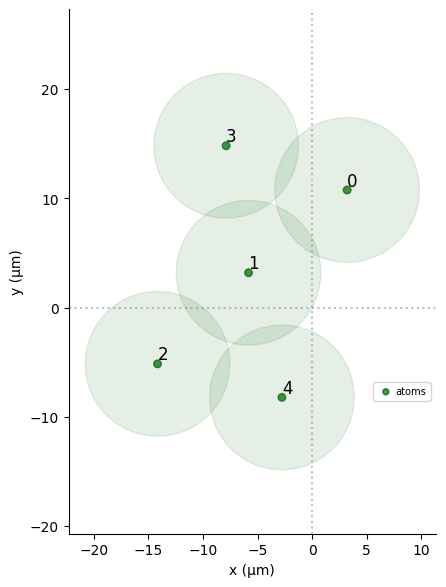

In [61]:
# Create a dictionary mapping qubit indices to their coordinates
qubits = dict(enumerate(coords))

# Create a Register object using the qubit coordinates
reg = Register(qubits)

# Draw the register with specified parameters
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

In [62]:
# We choose a median value between the min and the max
Omega = np.median(Q[Q>0].flatten())
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 10000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

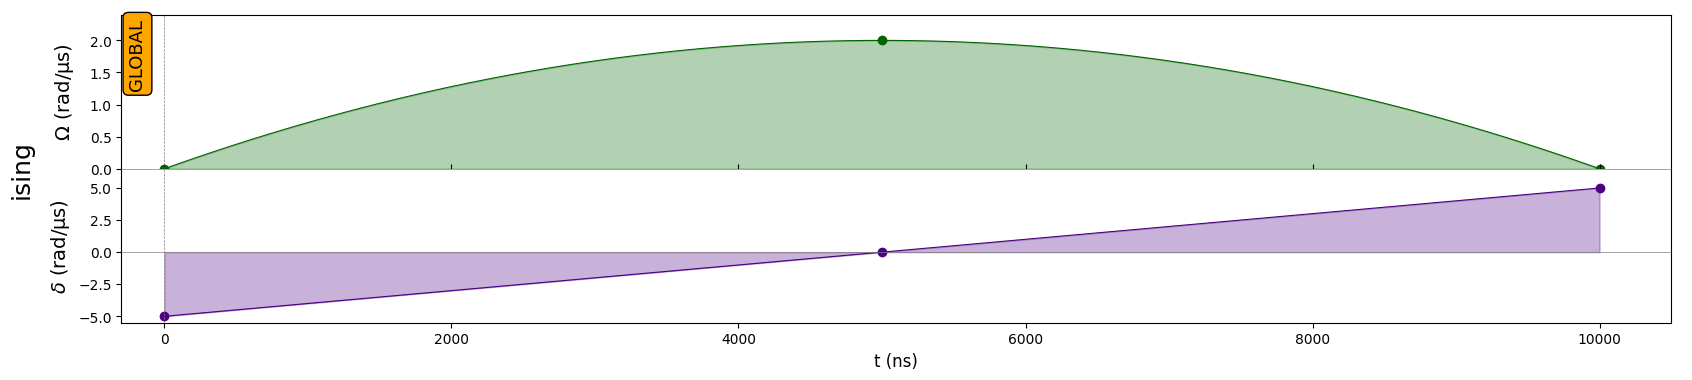

In [63]:
# Define the adiabatic pulse with InterpolatedWaveform
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)

# Create a Sequence object for the register using the DigitalAnalogDevice
seq = Sequence(reg, DigitalAnalogDevice)

# Declare a channel named "ising" with type "rydberg_global"
seq.declare_channel("ising", "rydberg_global")

# Add the adiabatic pulse to the "ising" channel
seq.add(adiabatic_pulse, "ising")

# Draw the sequence
seq.draw()

In [64]:
# Create a QutipEmulator object from the sequence
simul = QutipEmulator.from_sequence(seq)

# Run the simulation
results = simul.run()

# Get the final state of the simulation
final = results.get_final_state()

# Sample the final state to obtain counts
counts = results.sample_final_state()

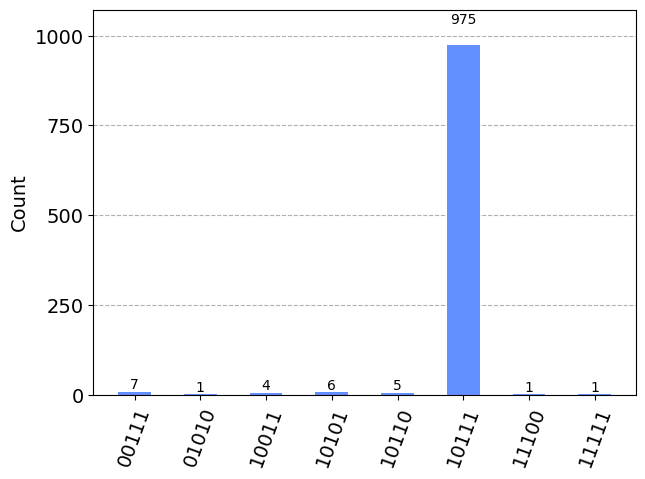

In [65]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [66]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 10111


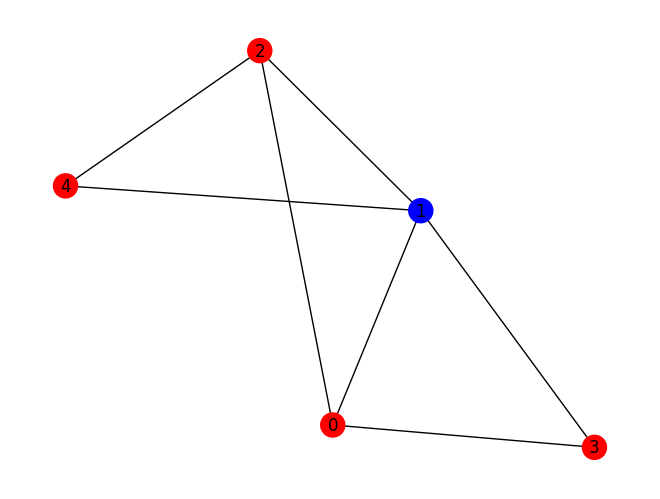

In [67]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G2, with_labels=True, node_color=node_colors)

In [68]:
cost = []
for T in 1000 * np.linspace(1, 10, 10):
    # Create a new Sequence object for each iteration
    seq = Sequence(reg, DigitalAnalogDevice)
    
    # Declare the "ising" channel with type "rydberg_global"
    seq.declare_channel("ising", "rydberg_global")
    
    # Define the adiabatic pulse with InterpolatedWaveform
    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [delta_0, 0, delta_f]),
        0,
    )
    
    # Add the adiabatic pulse to the "ising" channel
    seq.add(adiabatic_pulse, "ising")
    
    # Create a QutipEmulator object from the sequence
    simul = QutipEmulator.from_sequence(seq)
    
    # Run the simulation
    results = simul.run()
    
    # Get the final state of the simulation
    final = results.get_final_state()
    
    # Sample the final state to obtain counts
    count_dict = results.sample_final_state()
    
    # Calculate the cost and append it to the list
    cost.append(get_cost(count_dict, Q) / 3)

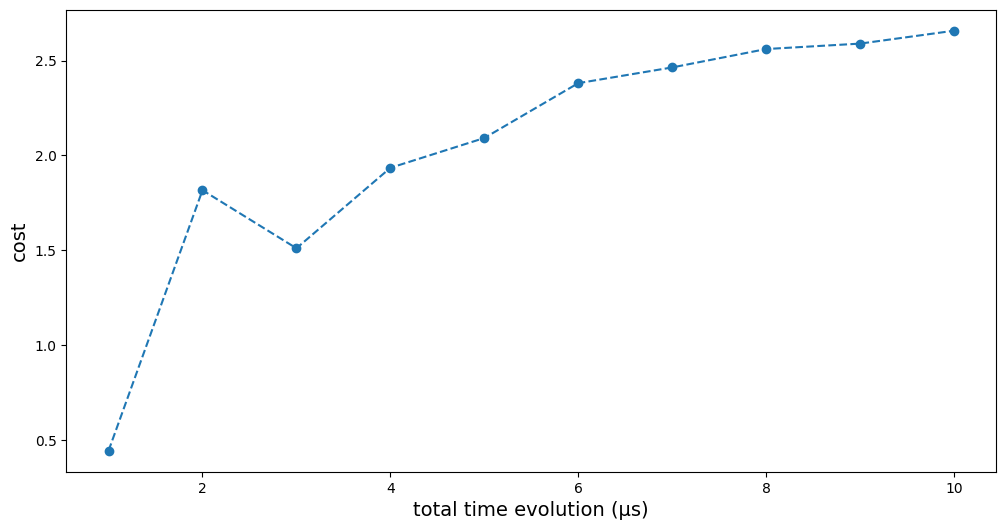

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(cost), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

---

## Quantum Adiabatic Simulation for 6 Node graph

In [70]:
Q = QUBO_matrix(edgesG3, 6)
Q

array([[-1.,  2.,  2.,  2.,  0.,  0.],
       [ 2., -1.,  0.,  2.,  0.,  2.],
       [ 2.,  0., -1.,  2.,  2.,  0.],
       [ 2.,  2.,  2., -1.,  0.,  2.],
       [ 0.,  0.,  2.,  0., -1.,  2.],
       [ 0.,  2.,  0.,  2.,  2., -1.]])

In [71]:
bitstrings = [np.binary_repr(i, len(Q)) for i in range(2 ** len(Q))]
costs = []

# Calculate the cost for each bitstring
for b in bitstrings:
    z = np.array(list(b), dtype=int)
    cost = z.T @ Q @ z
    costs.append(cost)

# Combine bitstrings and their corresponding costs into a list of tuples
zipped = zip(bitstrings, costs)

# Sort the list of tuples based on the cost
sort_zipped = sorted(zipped, key=lambda x: x[1])

# Print the sorted list of tuples
print(sort_zipped)

[('000110', -2.0), ('001001', -2.0), ('010010', -2.0), ('011000', -2.0), ('100001', -2.0), ('100010', -2.0), ('000001', -1.0), ('000010', -1.0), ('000100', -1.0), ('001000', -1.0), ('010000', -1.0), ('100000', -1.0), ('000000', 0.0), ('010110', 1.0), ('011001', 1.0), ('011010', 1.0), ('100011', 1.0), ('100110', 1.0), ('101001', 1.0), ('110010', 1.0), ('000011', 2.0), ('000101', 2.0), ('001010', 2.0), ('001100', 2.0), ('010001', 2.0), ('010100', 2.0), ('100100', 2.0), ('101000', 2.0), ('110000', 2.0), ('000111', 5.0), ('001011', 5.0), ('001101', 5.0), ('001110', 5.0), ('010011', 5.0), ('011100', 5.0), ('100101', 5.0), ('101010', 5.0), ('110001', 5.0), ('111000', 5.0), ('011011', 8.0), ('011110', 8.0), ('100111', 8.0), ('101011', 8.0), ('110011', 8.0), ('110110', 8.0), ('111001', 8.0), ('111010', 8.0), ('010101', 9.0), ('101100', 9.0), ('110100', 9.0), ('001111', 12.0), ('010111', 12.0), ('011101', 12.0), ('101101', 12.0), ('101110', 12.0), ('111011', 15.0), ('110101', 16.0), ('111100', 

In [72]:
shape = (len(Q), 2)

# Initialize an empty list to store costs
costs = []

# Set the random seed for reproducibility
np.random.seed(0)

# Generate initial random coordinates
x0 = np.random.random(shape).flatten()

# Perform optimization to find the optimal coordinates that minimize the cost
res = minimize(
    evaluate_mapping,
    x0,
    args=(Q, shape),
    method="Nelder-Mead",
    tol=1e-6,
    options={"maxiter": 200000},
)

# Reshape the optimized coordinates
coords = np.reshape(res.x, (len(Q), 2))

# Print the optimization result
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.7429148295322827
             x: [-1.538e+01  5.066e+00 -4.917e+00 -4.113e-01 -1.586e+01
                  1.686e+01 -5.405e+00  1.139e+01  1.640e+01  2.624e+00
                  5.058e+00  5.910e+00]
           nit: 6097
          nfev: 8336
 final_simplex: (array([[-1.538e+01,  5.066e+00, ...,  5.058e+00,
                         5.910e+00],
                       [-1.538e+01,  5.066e+00, ...,  5.058e+00,
                         5.910e+00],
                       ...,
                       [-1.538e+01,  5.066e+00, ...,  5.058e+00,
                         5.910e+00],
                       [-1.538e+01,  5.066e+00, ...,  5.058e+00,
                         5.910e+00]]), array([ 3.743e+00,  3.743e+00, ...,  3.743e+00,  3.743e+00]))

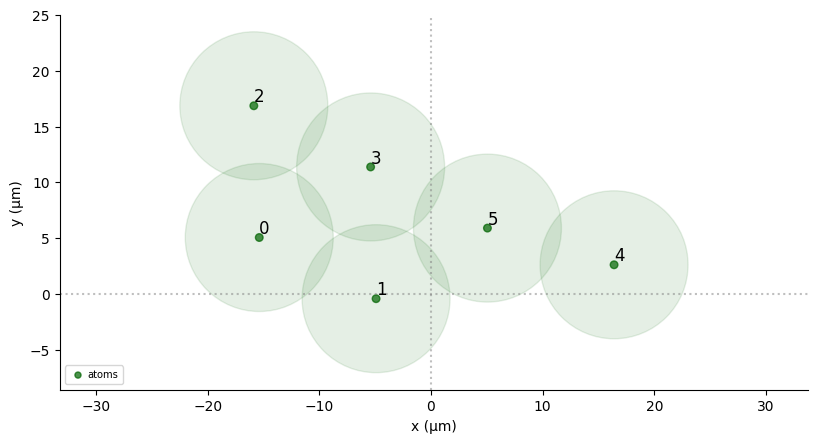

In [73]:
# Create a dictionary mapping qubit indices to their coordinates
qubits = dict(enumerate(coords))

# Create a Register object using the qubit coordinates
reg = Register(qubits)

# Draw the register with specified parameters
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

In [74]:
# We choose a median value between the min and the max
Omega = np.median(Q[Q > 0].flatten())
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 10000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

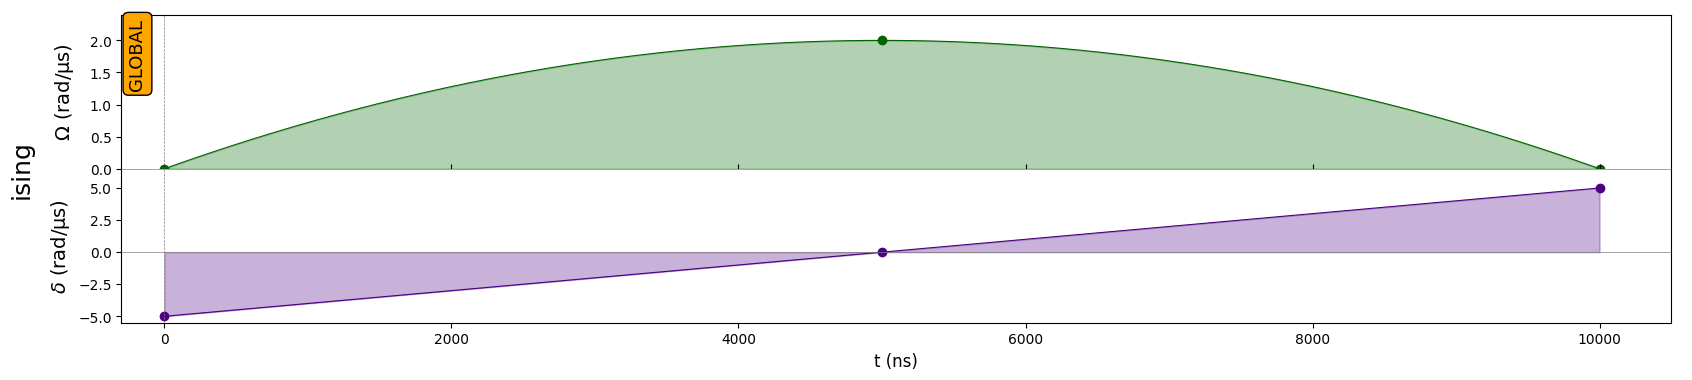

In [75]:
# Define the adiabatic pulse with InterpolatedWaveform
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)

# Create a Sequence object for the register using the DigitalAnalogDevice
seq = Sequence(reg, DigitalAnalogDevice)

# Declare a channel named "ising" with type "rydberg_global"
seq.declare_channel("ising", "rydberg_global")

# Add the adiabatic pulse to the "ising" channel
seq.add(adiabatic_pulse, "ising")

# Draw the sequence
seq.draw()

In [76]:
# Create a QutipEmulator object from the sequence
simul = QutipEmulator.from_sequence(seq)

# Run the simulation
results = simul.run()

# Get the final state of the simulation
final = results.get_final_state()

# Sample the final state to obtain counts
counts = results.sample_final_state()

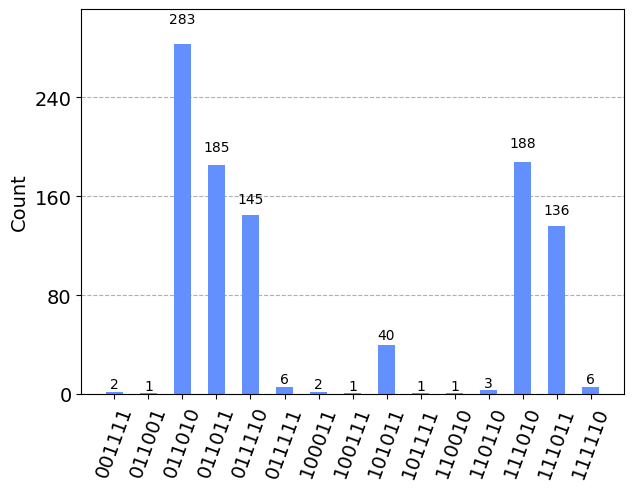

In [77]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [78]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 011010


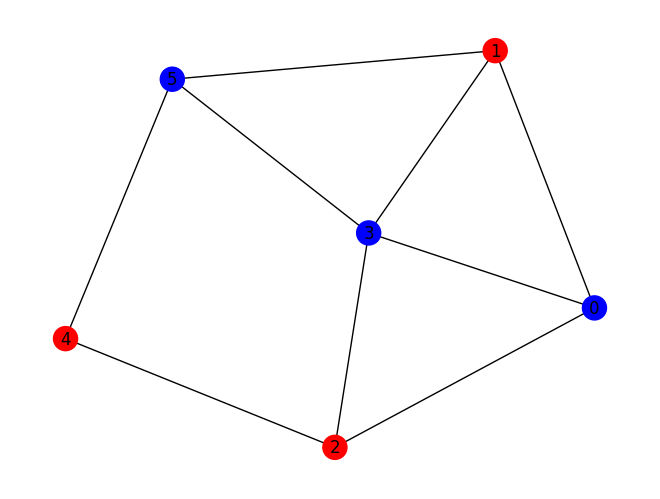

In [79]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G3, with_labels=True, node_color=node_colors)

In [80]:
cost = []
for T in 1000 * np.linspace(1, 10, 10):
    # Create a new Sequence object for each iteration
    seq = Sequence(reg, DigitalAnalogDevice)
    
    # Declare the "ising" channel with type "rydberg_global"
    seq.declare_channel("ising", "rydberg_global")
    
    # Define the adiabatic pulse with InterpolatedWaveform
    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [delta_0, 0, delta_f]),
        0,
    )
    
    # Add the adiabatic pulse to the "ising" channel
    seq.add(adiabatic_pulse, "ising")
    
    # Create a QutipEmulator object from the sequence
    simul = QutipEmulator.from_sequence(seq)
    
    # Run the simulation
    results = simul.run()
    
    # Get the final state of the simulation
    final = results.get_final_state()
    
    # Sample the final state to obtain counts
    count_dict = results.sample_final_state()
    
    # Calculate the cost and append it to the list
    cost.append(get_cost(count_dict, Q) / 3)

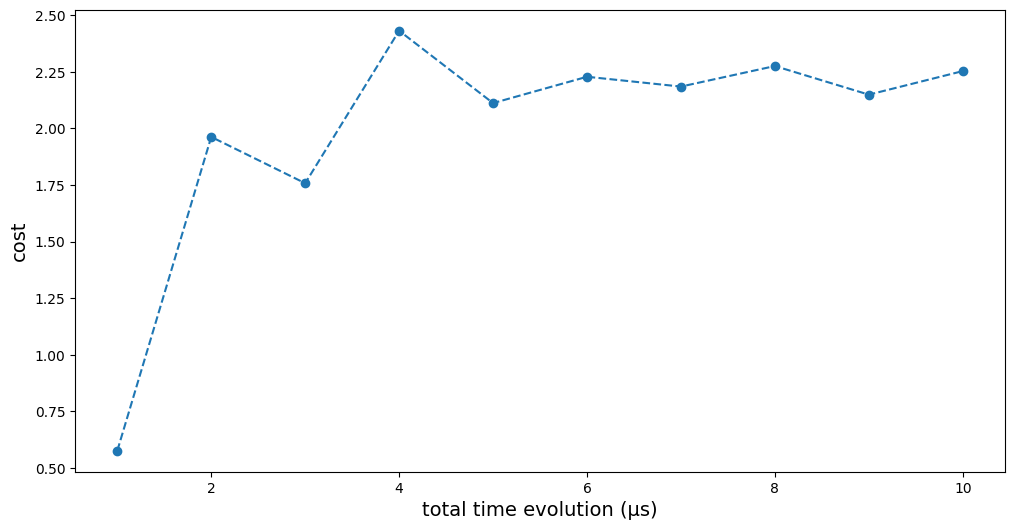

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(cost), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

---

## Quantum Adiabatic Simulation for 7 Node graph

In [82]:
Q = QUBO_matrix(edgesG4, 7)
Q

array([[-1.,  0.,  2.,  0.,  0.,  2.,  2.],
       [ 0., -1.,  2.,  2.,  0.,  2.,  2.],
       [ 2.,  2., -1.,  0.,  2.,  0.,  0.],
       [ 0.,  2.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0., -1.,  2.,  0.],
       [ 2.,  2.,  0.,  0.,  2., -1.,  0.],
       [ 2.,  2.,  0.,  0.,  0.,  0., -1.]])

In [83]:
bitstrings = [np.binary_repr(i, len(Q)) for i in range(2 ** len(Q))]
costs = []

# Calculate the cost for each bitstring
for b in bitstrings:
    z = np.array(list(b), dtype=int)
    cost = z.T @ Q @ z
    costs.append(cost)

# Combine bitstrings and their corresponding costs into a list of tuples
zipped = zip(bitstrings, costs)

# Sort the list of tuples based on the cost
sort_zipped = sorted(zipped, key=lambda x: x[1])

# Print the sorted list of tuples
print(sort_zipped)

[('0011011', -4.0), ('0001011', -3.0), ('0001101', -3.0), ('0010011', -3.0), ('0011001', -3.0), ('0011010', -3.0), ('1001100', -3.0), ('1100100', -3.0), ('0000011', -2.0), ('0000101', -2.0), ('0001001', -2.0), ('0001010', -2.0), ('0001100', -2.0), ('0010001', -2.0), ('0010010', -2.0), ('0011000', -2.0), ('0100100', -2.0), ('1000100', -2.0), ('1001000', -2.0), ('1100000', -2.0), ('0000001', -1.0), ('0000010', -1.0), ('0000100', -1.0), ('0001000', -1.0), ('0010000', -1.0), ('0100000', -1.0), ('1000000', -1.0), ('0000000', 0.0), ('0001111', 0.0), ('0011101', 0.0), ('1001101', 0.0), ('1101100', 0.0), ('0000111', 1.0), ('0001110', 1.0), ('0010101', 1.0), ('0011100', 1.0), ('0100101', 1.0), ('0101100', 1.0), ('1000101', 1.0), ('1001001', 1.0), ('1001010', 1.0), ('1011000', 1.0), ('1101000', 1.0), ('0000110', 2.0), ('0010100', 2.0), ('0100001', 2.0), ('0100010', 2.0), ('0101000', 2.0), ('0110000', 2.0), ('1000001', 2.0), ('1000010', 2.0), ('1010000', 2.0), ('0011111', 3.0), ('0010111', 4.0), 

In [84]:
shape = (len(Q), 2)

# Initialize an empty list to store costs
costs = []

# Set the random seed for reproducibility
np.random.seed(0)

# Generate initial random coordinates
x0 = np.random.random(shape).flatten()

# Perform optimization to find the optimal coordinates that minimize the cost
res = minimize(
    evaluate_mapping,
    x0,
    args=(Q, shape),
    method="Nelder-Mead",
    tol=1e-6,
    options={"maxiter": 200000},
)

# Reshape the optimized coordinates
coords = np.reshape(res.x, (len(Q), 2))

# Print the optimization result
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 6.224845672151085
             x: [ 2.875e+00  1.464e+01 ...  7.094e+00  2.569e+01]
           nit: 6297
          nfev: 8502
 final_simplex: (array([[ 2.875e+00,  1.464e+01, ...,  7.094e+00,
                         2.569e+01],
                       [ 2.875e+00,  1.464e+01, ...,  7.094e+00,
                         2.569e+01],
                       ...,
                       [ 2.875e+00,  1.464e+01, ...,  7.094e+00,
                         2.569e+01],
                       [ 2.875e+00,  1.464e+01, ...,  7.094e+00,
                         2.569e+01]]), array([ 6.225e+00,  6.225e+00, ...,  6.225e+00,  6.225e+00]))

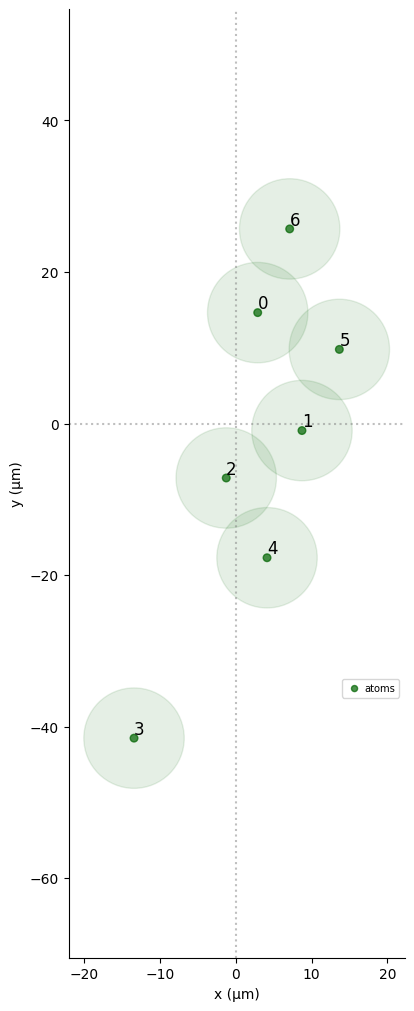

In [85]:
# Create a dictionary mapping qubit indices to their coordinates
qubits = dict(enumerate(coords))

# Create a Register object using the qubit coordinates
reg = Register(qubits)

# Draw the register with specified parameters
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=False,
    draw_half_radius=True,
)

In [86]:
# We choose a median value between the min and the max
Omega = np.median(Q[Q > 0].flatten())
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 4000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

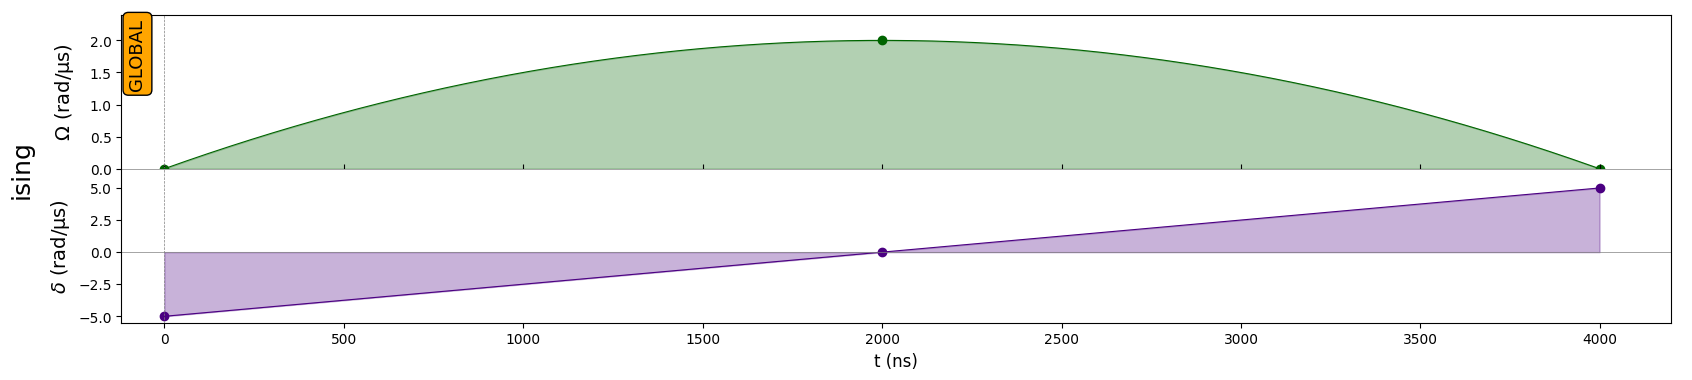

In [87]:
# Define the adiabatic pulse with InterpolatedWaveform
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)

# Create a Sequence object for the register using the DigitalAnalogDevice
seq = Sequence(reg, DigitalAnalogDevice)

# Declare a channel named "ising" with type "rydberg_global"
seq.declare_channel("ising", "rydberg_global")

# Add the adiabatic pulse to the "ising" channel
seq.add(adiabatic_pulse, "ising")

# Draw the sequence
seq.draw()

In [88]:
# Create a QutipEmulator object from the sequence
simul = QutipEmulator.from_sequence(seq)

# Run the simulation
results = simul.run()

# Get the final state of the simulation
final = results.get_final_state()

# Sample the final state to obtain counts
counts = results.sample_final_state()

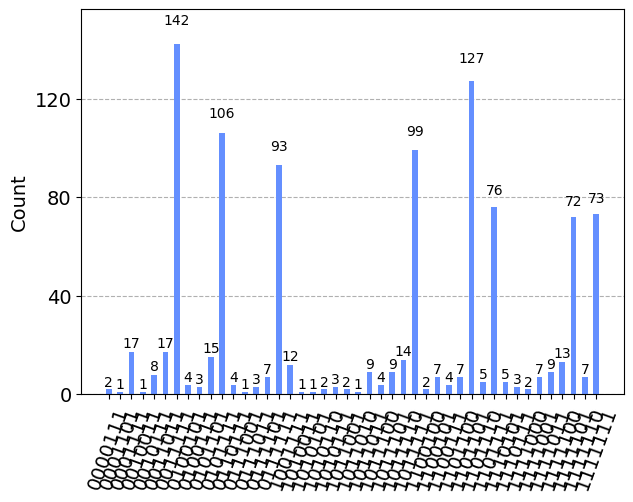

In [89]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [90]:
# Find the bitstring with the maximum count in the measurement outcomes
max_bitstring = max(counts, key=lambda x: counts[x])

# Print the bitstring with the maximum count
print("Bit string with maximum count:", max_bitstring)

Bit string with maximum count: 0011111


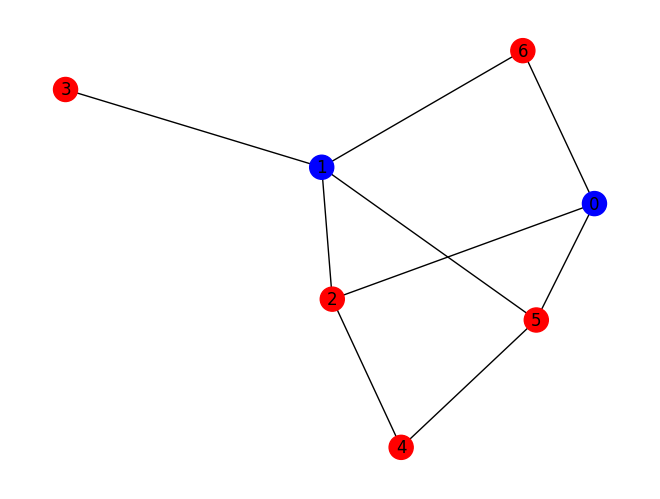

In [91]:
# Assign colors based on the bit string
node_colors = ['red' if bit == '1' else 'blue' for bit in max_bitstring]

# Draw the graph with node colors
mpl_draw(G4, with_labels=True, node_color=node_colors)

In [92]:
cost = []
for T in 1000 * np.linspace(1, 10, 10):
    # Create a new Sequence object for each iteration
    seq = Sequence(reg, DigitalAnalogDevice)
    
    # Declare the "ising" channel with type "rydberg_global"
    seq.declare_channel("ising", "rydberg_global")
    
    # Define the adiabatic pulse with InterpolatedWaveform
    adiabatic_pulse = Pulse(
        InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
        InterpolatedWaveform(T, [delta_0, 0, delta_f]),
        0,
    )
    
    # Add the adiabatic pulse to the "ising" channel
    seq.add(adiabatic_pulse, "ising")
    
    # Create a QutipEmulator object from the sequence
    simul = QutipEmulator.from_sequence(seq)
    
    # Run the simulation
    results = simul.run()
    
    # Get the final state of the simulation
    final = results.get_final_state()
    
    # Sample the final state to obtain counts
    count_dict = results.sample_final_state()
    
    # Calculate the cost and append it to the list
    cost.append(get_cost(count_dict, Q) / 3)

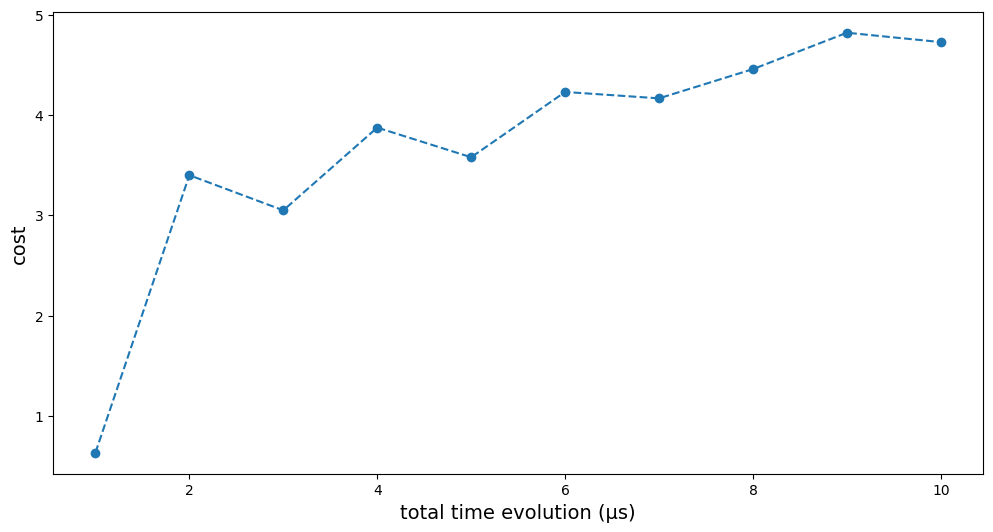

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(cost), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

---
---

# Comparison between QAOA and Quantum Adiabatic Simulation

## Differences between QAOA and Quantum Adiabatic Simulation

1. **Approach**:
   - **QAOA**: QAOA is a quantum algorithm designed to approximate solutions to combinatorial optimization problems by preparing a quantum state that encodes the solution space and applying a sequence of quantum gates to manipulate this state.
   - **Quantum Adiabatic Simulation**: Quantum adiabatic simulation involves evolving a quantum system from an initial state to a final state in such a way that the system follows the ground state of a time-dependent Hamiltonian. The ground state of the final Hamiltonian encodes the solution to the optimization problem.

3. **Hamiltonian**:
   - **QAOA**: In QAOA, the Hamiltonian is typically constructed based on the optimization problem being solved. The objective is to prepare a state that minimizes the expectation value of this Hamiltonian.
   - **Quantum Adiabatic Simulation**: The Hamiltonian in quantum adiabatic simulation consists of two parts: the initial Hamiltonian \(H_0\) and the final Hamiltonian \(H_f\). The system starts in the ground state of \(H_0\) and evolves slowly to the ground state of \(H_f\), which encodes the solution to the optimization problem.

4. **Control Parameters**:
   - **QAOA**: QAOA involves variational parameters that determine the rotations applied to the initial state to reach the optimal solution.
   - **Quantum Adiabatic Simulation**: The control parameters in quantum adiabatic simulation include the annealing schedule, which determines how the Hamiltonian changes over time, and possibly other parameters related to the system's interaction strengths.

5. **Optimization Process**:
   - **QAOA**: QAOA typically involves optimizing the variational parameters through classical optimization techniques to minimize the expectation value of the cost function.
   - **Quantum Adiabatic Simulation**: Quantum adiabatic simulation relies on the adiabatic theorem, which guarantees that if the system evolves slowly enough, it will remain in the ground state of the Hamiltonian at all times. The optimization process involves finding an annealing schedule that allows the system to evolve adiabatically.

6. **Speed and Performance**:
   - **QAOA**: QAOA may require fewer qubits and shorter quantum circuits compared to quantum adiabatic simulation. However, finding the optimal variational parameters can be computationally intensive.
   - **Quantum Adiabatic Simulation**: Quantum adiabatic simulation may require more qubits and longer evolution times. It is less sensitive to errors in gate operations but may be limited by the adiabaticity condition and the complexity of preparing the initial state.

In summary, while both QAOA and quantum adiabatic simulation aim to solve combinatorial optimization problems using quantum computers, they differ in their approach, Hamiltonian formulation, optimization process, and performance characteristics. Each method has its advantages and limitations, and the choice between them depends on factors such as problem size, resource constraints, and algorithmic preferences.


## Advantages of Quantum Adiabatic Simulation over QAOA

From the experiments conducted so far, it has been observed that Quantum Adiabatic Simulation $QAS$ exhibits certain advantages over the Quantum Approximate Optimization Algorithm ($QAOA$). One notable finding is that $QAS$ tends to require less computational time compared to $QAOA$, especially for larger graphs. This is particularly advantageous in scenarios where computational resources are limited or when solving complex optimization problems in a time-efficient manner is crucial.

Moreover, while both QAS and QAOA may require adjustments to parameters such as the number of layers $( p )$ for $QAOA$ or the time evolution duration for $QAS$ to achieve optimal results, the complexity of $QAS$ does not significantly increase as the size of the graph or problem instance grows. This is because the computational effort in $QAS$ is primarily focused on finding the appropriate annealing schedule to drive the system to the ground state of the target Hamiltonian, rather than on increasing the complexity of quantum circuits.

In contrast, $QAOA$ may necessitate the use of larger values of $ p $ to increase the amplitude of the correct solution, particularly for larger graphs. However, increasing the number of layers in QAOA circuits can significantly impact the computational resources required, as it leads to a higher number of variational parameters that need to be optimized. Consequently, the computational cost of QAOA may escalate rapidly with the size of the problem.

Another key consideration is the robustness of each approach to noise and imperfections inherent in current quantum hardware. $QAS$ is generally less sensitive to gate errors and decoherence during the adiabatic evolution process, as long as the system evolves slowly enough to maintain adiabaticity. On the other hand, QAOA's performance may be more susceptible to noise due to the necessity of accurately tuning and controlling variational parameters within quantum circuits.

In summary, while both $QAS$ and $QAOA$ offer promising avenues for solving combinatorial optimization problems on quantum computers, their suitability may vary depending on factors such as problem size, available computational resources, and noise resilience requirements. Further research and experimentation are necessary to fully understand the strengths and limitations of each approach in different practical scenarios.


### Despite submitting the task for screening, I am still encountering difficulties with solving the problem for some experiments involving higher-node graphs. Both the Quantum Approximate Optimization Algorithm (QAOA) and Quantum Adiabatic Simulation (QS) approaches yield the correct solution for the Maximum Independent Set (MIS) when tested individually using a cost function for QAOA and a QUBO matrix for QS. However, when these methods are applied in the experiments, they fail to produce the expected results. I am currently investigating where the issue lies and attempting to identify the source of the problem.

If any mentors have insights into the root cause of the problem I am facing, I kindly request their assistance in navigating towards a solution.

Feel free to suggest any strategies or recommendations to address this issue. Your guidance would be greatly appreciated. I will update with the commit, after the results were announced for the mentorship program.